Read an earthquake file

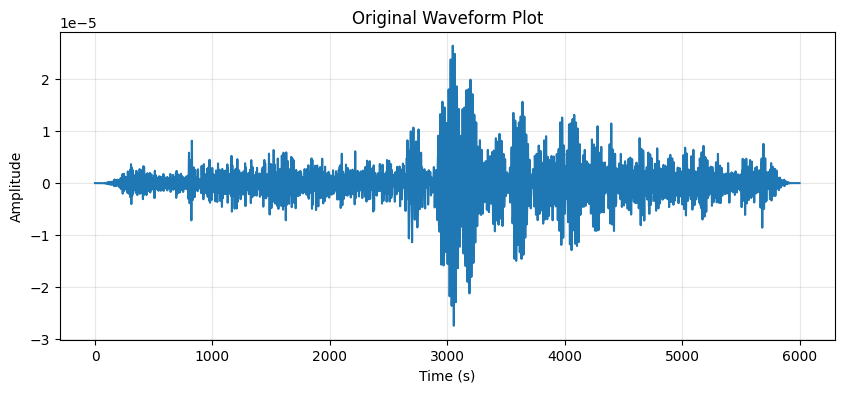

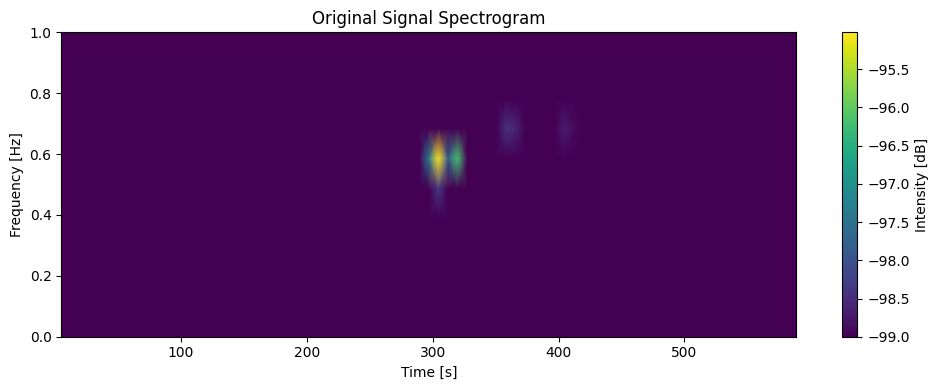

In [10]:
import matplotlib.pyplot as plt 
from scipy.io import wavfile
import numpy as np
from scipy.signal import resample_poly, spectrogram
import IPython.display as ipd

# Read and process your data
times = []
amps = []
sample_rate = 100   # Hz

with open("hhz_filtered_G31_20230520T015107.txt", "r") as quake:
    content = quake.readlines()
    for line in content:
        line_data = line.strip().split('\t')
        if len(line_data) >= 2:
            times.append(float(line_data[0]))
            amps.append(float(line_data[1]))

times = np.array(times)
amps = np.array(amps)

plt.figure(figsize=(10, 4))
plt.plot(times, amps)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original Waveform Plot')
plt.grid(True, alpha=0.3)

# Plot the spectrogram in dB
plt.figure(figsize=(10, 4))
frequencies, time_segments, Sxx = spectrogram(amps, fs=sample_rate, nperseg=1024, noverlap=256, scaling='spectrum')

plt.pcolormesh(time_segments, frequencies, 10 * np.log10(Sxx + 1e-10), shading='gouraud', cmap='viridis', vmin=-99)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.title('Original Signal Spectrogram')
plt.colorbar(label='Intensity [dB]')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

In [3]:
desired_sample_rate = 88200  # Hz (standard audio sampling rate)

up = desired_sample_rate / sample_rate 
down = 1

# Resample the signal
signal = resample_poly(amps, up, down)

print(len(signal))
sig_times = np.linspace(0, len(signal) / desired_sample_rate, num=len(signal))

wavfile.write('quake_audio.wav', desired_sample_rate, np.array(signal, dtype=np.float32))

52920000
